## 60. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [4]:
from gensim.models import KeyedVectors
path='data/GoogleNews-vectors-negative300.bin'
model=KeyedVectors.load_word2vec_format(path,binary=True)

In [5]:
print(model["United_States"].shape)

(300,)


## 61. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ

In [6]:
print(model.similarity("United_States","U.S."))

0.7310774298319467


## 62. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [7]:
print(model.similar_by_word("United_States", topn=10, restrict_vocab=None))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370391845703), ('United_Sates', 0.74007248878479), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.6019070148468018)]


## 63. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [8]:
result=model.most_similar(positive=['Spain', 'Madrid'], negative=['Athen'])
print(result[:10])

[('Barcelona', 0.6144351959228516), ('Spaniards', 0.6109636425971985), ('Spanish', 0.5950990319252014), ('Malaga', 0.5874851942062378), ('Zapatero', 0.5701757669448853), ('Málaga', 0.5662754774093628), ('Catalonia', 0.5587519407272339), ('Spains', 0.5553228855133057), ('Salave_Gold_Deposit', 0.5505107641220093), ('Valencia', 0.5496729612350464)]


## 64. アナロジーデータでの実験

単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [9]:
path2='data/analogydata.txt'
path3='work/result_analogy-damy.txt'#damyとったやつがほんとの名前
n=0
with open(path2) as f:
    write_result=open(path3,'w')
    for line in f:
        #print(line)
        words=line.strip().split()
        if len(words)==4:
            result=model.most_similar(positive=[words[1], words[2]], negative=[words[0]])
            #write_result.write(line.strip()+" "+str(result[0][0])+" "+str(result[0][1])+"\n")
    write_result.close()


        

'        \n        n+=1\n        if n==5:\n            break\n'

In [10]:
!head work/result_analogy.txt  10

==> work/result_analogy.txt <==
Athens Greece Baghdad Iraq Iraqi 0.6351871490478516
Athens Greece Bangkok Thailand Thailand 0.7137669324874878
Athens Greece Beijing China China 0.7235777974128723
Athens Greece Berlin Germany Germany 0.6734622716903687
Athens Greece Bern Switzerland Switzerland 0.4919748306274414
Athens Greece Cairo Egypt Egypt 0.7527809739112854
Athens Greece Canberra Australia Australia 0.583732545375824
Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
Athens Greece Havana Cuba Cuba 0.6460991501808167
Athens Greece Helsinki Finland Finland 0.6899983286857605
head: 10: No such file or directory


## 65. アナロジータスクでの正解率

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ

In [49]:
path4='data/result_analogy.txt'
count=0
leng=0
catgory_count = 0
with open (path4) as f:
    for i,line in enumerate(f):
        #書き込んだファイルにコロンの情報を入れてないのでこれで分割した
        if i == 8869:
            print("semantic-analogy",count/leng*100)
            count=0
            leng=0
                
        word=line.strip().split()
        if word[3]==word[4]:
            count+=1
        leng+=1    
    print("syntactic-analogy",count/leng*100)
        

semantic-analogy 73.08602999210734
syntactic-analogy 74.00468384074942


## 66. WordSimilarity-353での評価

The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [44]:
import scipy
from scipy.stats import spearmanr

spearman_point=0
data_list_human_eval=[]
data_list_cos_sim=[]
variance=0
count=0


with open("data/combined.csv") as f:
    for i,line in enumerate(f):
        if i > 0:
            w1, w2, human = line.split(",")
            data_list_human_eval.append(human)
            data_list_cos_sim.append(model.similarity(w1,w2))
            
c,p=spearmanr(data_list_cos_sim,data_list_human_eval)
print(c)

        

0.6849564489532376


## 67. k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [3]:
#prepare country vector 
import pandas as pd
import numpy as np

#2単語はアンダーバーで繋げるといいかも

#prepare copuntry name list
countries_data = pd.read_csv('https://raw.githubusercontent.com/datasets/country-list/master/data.csv')
countries_name_list = list(countries_data.Name)
print(countries_name_list[:10])

#if country name is out of vocab zero vevtor 
countries_vector_list = [model[country_name] if (country_name in model.vocab) else 
                         np.zeros(300) for country_name in countries_name_list]



['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda']


In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(countries_vector_list)
label_km = kmeans.labels_

N = 0
for index in range(len(countries_name_list)):
    if label_km[index] == N:
        print(countries_name_list[index])
    if index > 50 :break
        
    

Algeria
Angola
Benin
Botswana
Burundi
Cameroon
Comoros
Congo


## 68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．



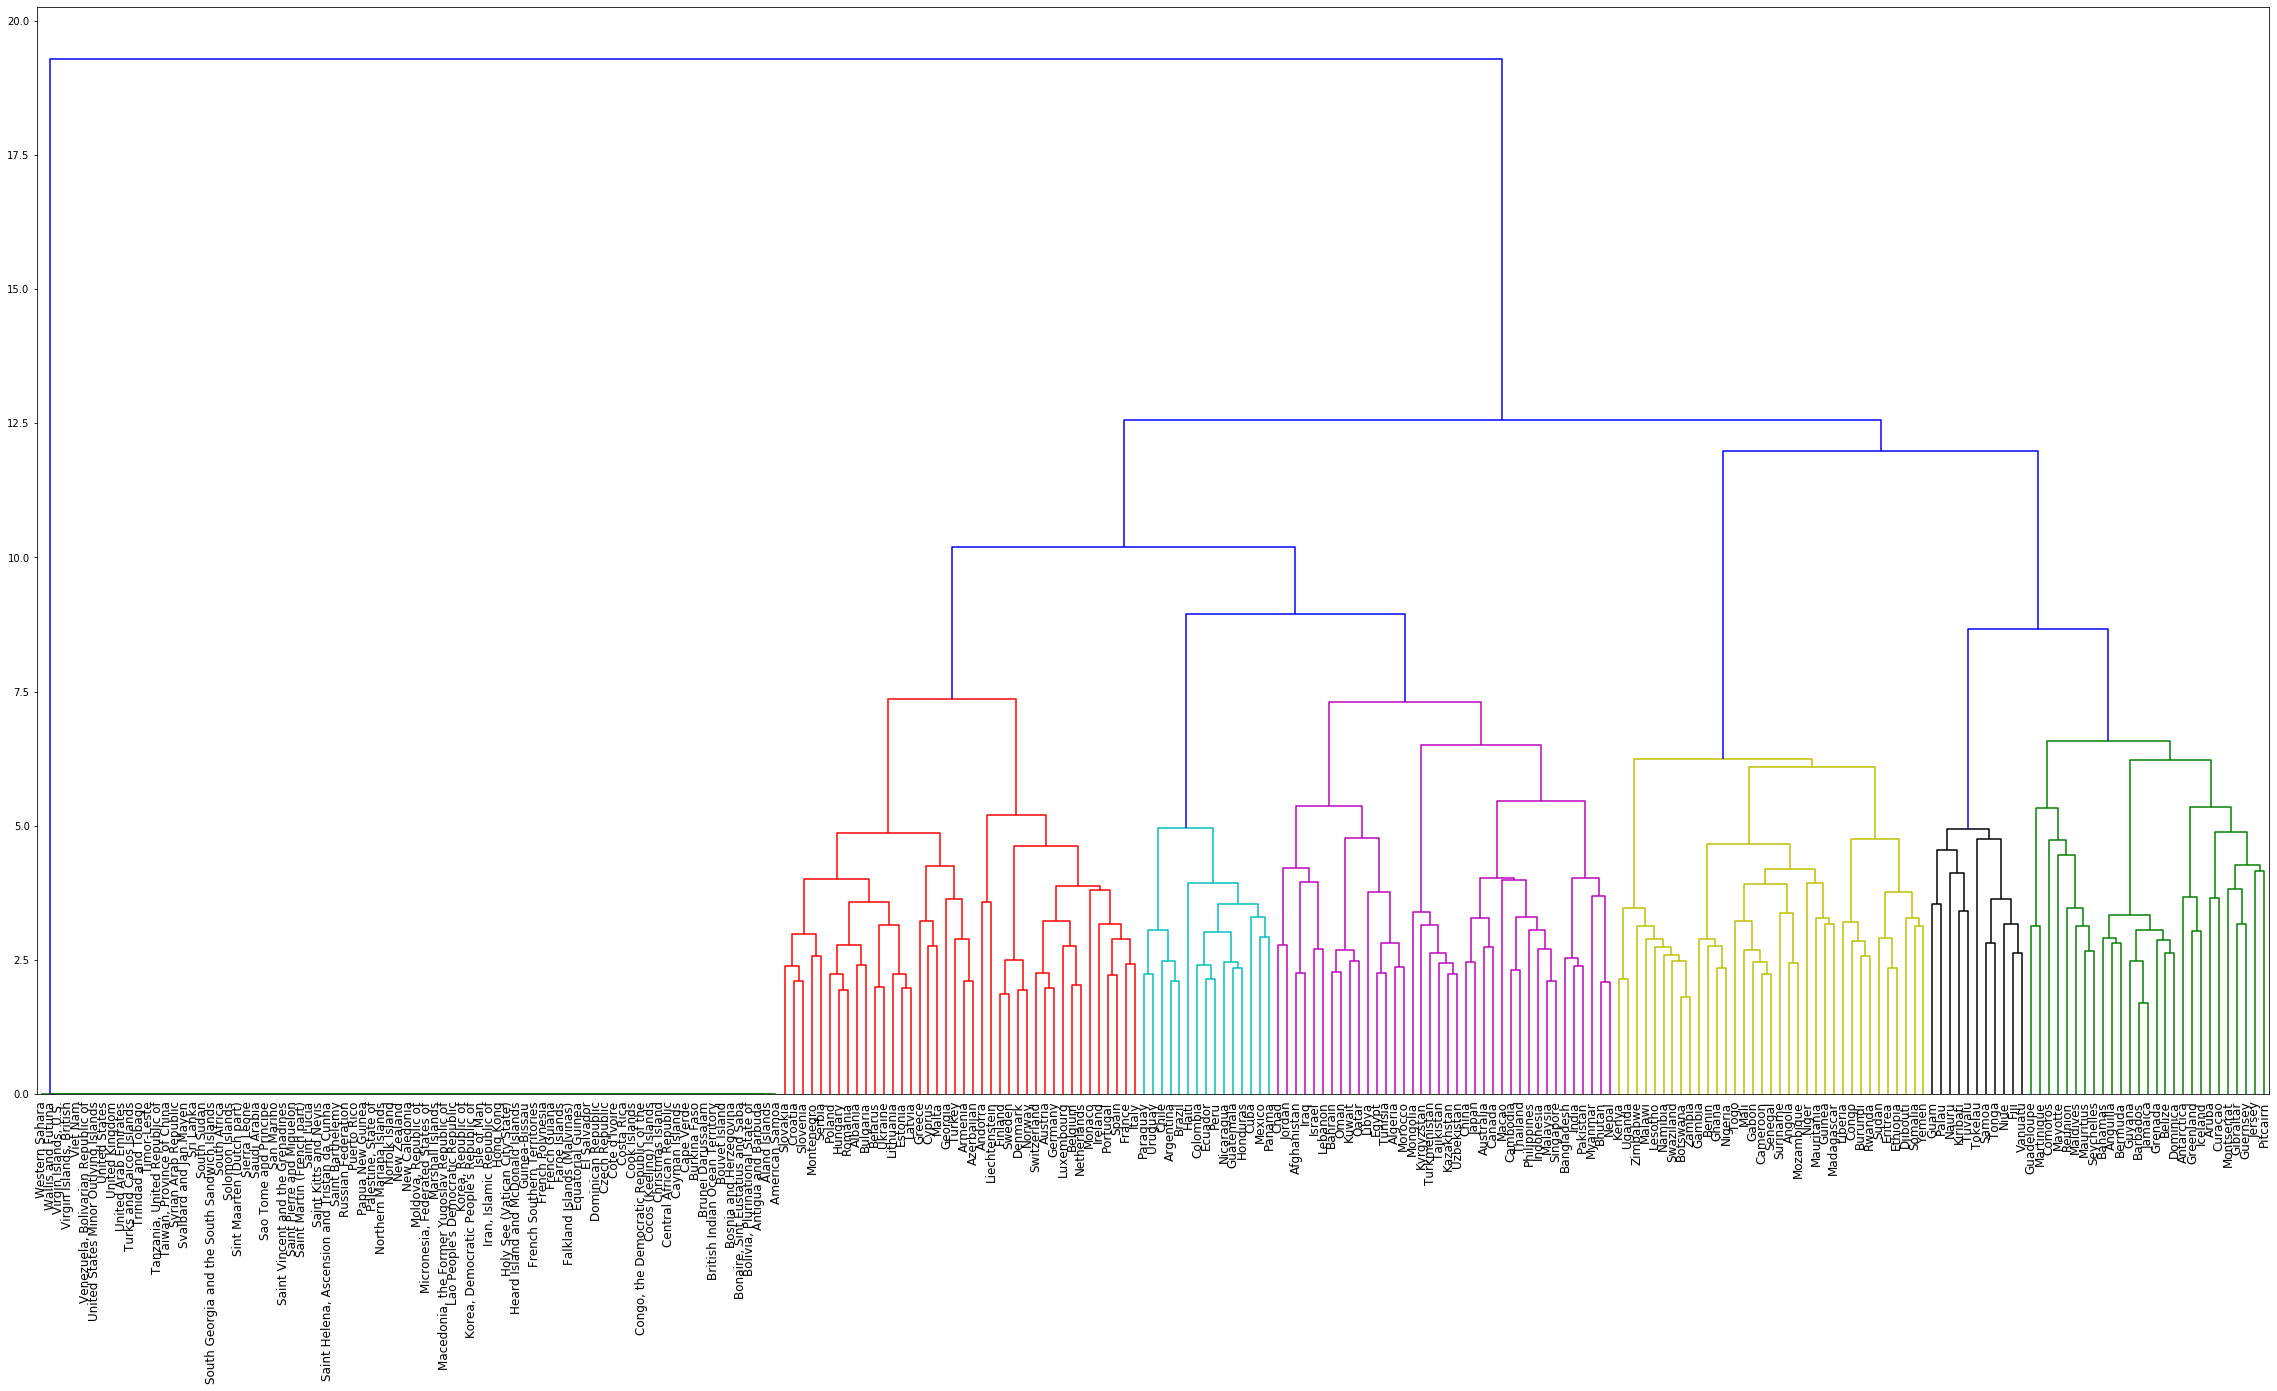

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(countries_vector_list,'ward')

fig = plt.figure(figsize=(40, 20))
threshold = 0.4*np.max(Z[:,2])

dn = dendrogram(Z,labels=countries_name_list,color_threshold=threshold,leaf_font_size=12)
plt.show()


## 69. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

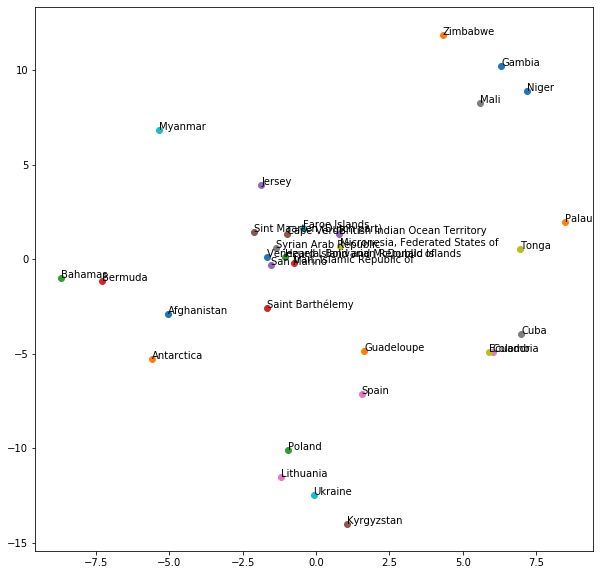

In [37]:
#69
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


#UMAPいいかも
tsne=TSNE(n_components=2)
X_scaled=tsne.fit_transform(countries_vector_list)

plt.figure(figsize=(10, 10))
for i in range(len(countries_name_list)):
    if i%8 == 0: 
        plt.scatter(X_scaled[i][0], X_scaled[i][1])
        plt.annotate(countries_name_list[i],(X_scaled[i][0], X_scaled[i][1]))
